# I. Exploratory Data Analysis

In [1]:
# Import packages and data 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('HeatingLoad_training.csv')
test = pd.read_csv('HeatingLoad_test_without_HL.csv')

## 1. Preliminary Data Cleaning

Before delving into the actual exploratory data analysis, we prioritized the crucial step of preliminary data cleaning. This process is instrumental in ensuring the accuracy and reliability of our study.

In [2]:
# Inspect the number of rows and columns
train.shape

(10000, 8)

In [3]:
# Inspect the first 10 rows of the training dataset
train.head(10)

,BuildingAge,BuildingHeight,Insulation,AverageTemperature,SunlightExposure,WindSpeed,OccupancyRate,HeatingLoad
0,18.56,30.36,1,13.75,453.67,3.89,0.65,275.89
1,13.82,9.64,0,18.70,138.85,0.95,0.55,208.02
2,36.47,8.44,1,18.23,190.31,4.71,0.56,234.86
3,23.23,18.71,1,21.89,313.15,8.51,0.25,243.89
4,11.62,11.95,0,19.49,117.53,1.57,0.58,205.94
5,16.20,19.30,0,11.56,610.18,6.18,0.32,243.53
6,17.49,64.82,0,17.87,640.13,3.01,0.42,445.29
7,15.44,9.96,1,11.85,129.58,5.24,0.70,220.36
8,12.10,62.43,0,12.43,631.77,3.92,0.41,430.55
9,25.65,4.22,1,13.99,273.54,8.13,0.29,222.88


In [4]:
# Inspect the number of missing values in each column
train.isna().sum()

BuildingAge           0
BuildingHeight        0
Insulation            0
AverageTemperature    0
SunlightExposure      0
WindSpeed             0
OccupancyRate         0
HeatingLoad           0
dtype: int64

In [5]:
# Inspect the data type of each column
train.dtypes

BuildingAge           float64
BuildingHeight        float64
Insulation              int64
AverageTemperature    float64
SunlightExposure      float64
WindSpeed             float64
OccupancyRate         float64
HeatingLoad           float64
dtype: object

As we do not see any missing values in the dataset, this is not a problem for the dataset. The data types of each variable in the dataset are also appropriate, with all float and int data types. Hence, no changes are need in the process of preliminary data cleaning, and we can move on to the actual exploratory data analysis

## 2. Exploratory Analysis

Firstly, we start by inspecting the descriptive statistics:

In [6]:
train.describe().round(4)

,BuildingAge,BuildingHeight,Insulation,AverageTemperature,SunlightExposure,WindSpeed,OccupancyRate,HeatingLoad
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,22.7655,20.7921,0.5960,18.0249,271.3616,4.4907,0.5001,260.0786
std,12.3860,16.8827,0.4907,4.0907,229.2752,2.5312,0.2220,74.5919
min,2.9900,3.0700,0.0000,1.6800,1.1500,0.0700,0.0100,173.6800
25%,14.2500,9.3100,0.0000,15.2700,100.0825,2.6100,0.3300,218.0875
50%,20.0900,15.0200,1.0000,18.0200,182.4350,4.1000,0.5000,236.8000
75%,28.0925,25.8300,1.0000,20.8100,407.0900,5.9600,0.6700,270.3500
max,153.8800,106.3600,1.0000,34.3400,1250.7100,18.9100,1.0000,793.9200


The HeatingLoad descriptive statistics show that it does not have a high standard deviation relative to the mean, suggesting that the distribution of the response might be approximately symmetrically distributed. The same observation applies for all predictors, with all standard deviations below the mean. 

However, looking at the quartiles, maximum, and minimum values of the numerical variables, we can identify a possible large number of outliers in the dataset, potentially causing a breach of the finite 4th moment assumptions while performing linear regression. 

Next, we examine the correlation of each predictor to the response variable HeatingLoad:

In [7]:
train.corr().round(4)['HeatingLoad']

BuildingAge           0.2077
BuildingHeight        0.9372
Insulation           -0.0202
AverageTemperature   -0.0878
SunlightExposure      0.4544
WindSpeed             0.0428
OccupancyRate         0.0078
HeatingLoad           1.0000
Name: HeatingLoad, dtype: float64

As we can see, the three variables having the highest correlations with Heating Load are:

- **Building Height: 0.9372** 

Building Height has a strong positive correlation (0.9372) with HeatingLoad. This means that as the height of the building increases, the amount of heating energy required also increases significantly.

This is reasonable as higher buildings would have higher heating energy requirements due to larger number of floors. Additionally, taller buildings may experience more heat loss due to increased surface area exposed to the external environment, particularly at the roof and upper walls.

- **Sunlight Exposure: 0.4544** 

Sunlight Exposure has a moderate positive correlation (0.4544) with HeatingLoad. This indicates that higher levels of solar energy received are somewhat associated with an increase in heating energy required.

This moderate relationship might be unreasonable at first glance because we would expect heating load requirements to reudce due to higher natural warmth from sunlight. However, sunlight exposure can increase heating load requirements if it is poorly distributed in winter seasons or non-solar parts of buildings. Moreover, buildings with more sunlight exposure might also have larger windows that lead to heat loss, requiring more heating.


- **Building Age: 0.2077**

Building Age also has a low-to-moderate positive correlation (0.2077) with HeatingLoad. This suggests that older buildings tend to require slightly more heating energy, but the relationship is not very strong.

Older buildings usually have lower heating efficiency due to older heating systems, which requires a higher heating load. However, the low-to-moderate correlation suggest that some old buildings in the dataset might have been upgraded with modern heat-saving systems.

- **Other Predictors**

The other predictors have very low correlation with HeatingLoad, close to 0. 

Therefore, the three varibles mentioned above seem to be the main predictors in this data, with BuildingHeight being the key linear predictor. To continue the exploratory analysis, we conduct a Pairplot Matrix to examine possible non-linear relationships between the main predictors and HeatingLoad, and distribution for each of these variable.

/Users/bihugo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/3r/42snhvt577z7kf7v8djnkct00000gn/T/ipykernel_37527/3496657708.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


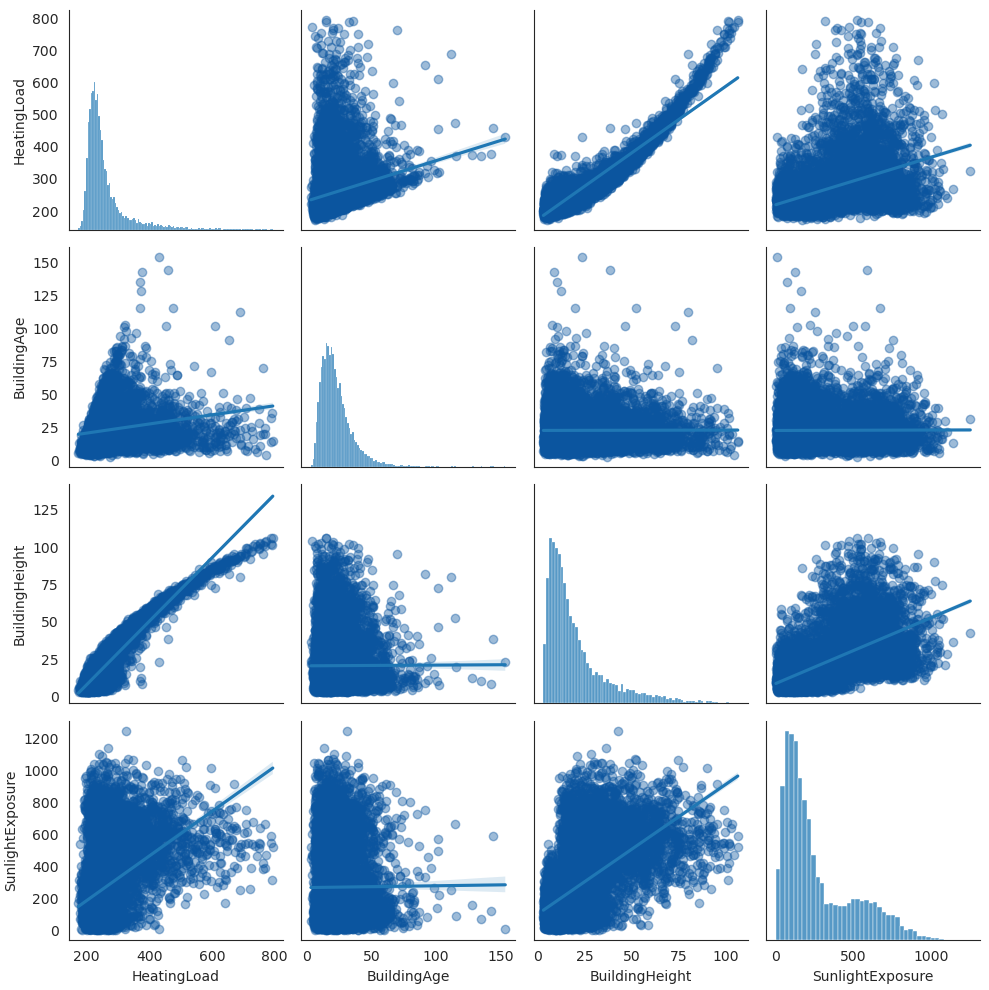

In [8]:
key_variables = ['HeatingLoad', 'BuildingAge','BuildingHeight', 'SunlightExposure']
with sns.axes_style('white'):
    g=sns.pairplot(train[key_variables], kind='reg',
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()

With the Pairplot Matrix's scatterplots, we can observe the following potential non-linear relationships between the predictors and HeatingLoad:

- **Building Height:**

The scatterplot is curved, showing a non-linear relationship with HeatingLoad.

- **Sunlight Exposure:** 

The scatterplot has a cone shape, showing the heteroscedasticity problem of non-constant error variance across values.

- **Building Age:** 

The scatterplot has a cone shape, showing the heteroscedasticity problem of non-constant error variance across values.

For the distribution plots, we can see that they have a right-skewed distribution. This implies that the higher values in the dataset are more spread out than the lower values. Therefore, we can state that most of the building in the dataset have low height, sunlight exposure, age, and heating load. 

Next, we can use a correlation heat-map to examine the correlation of the predictors with each other

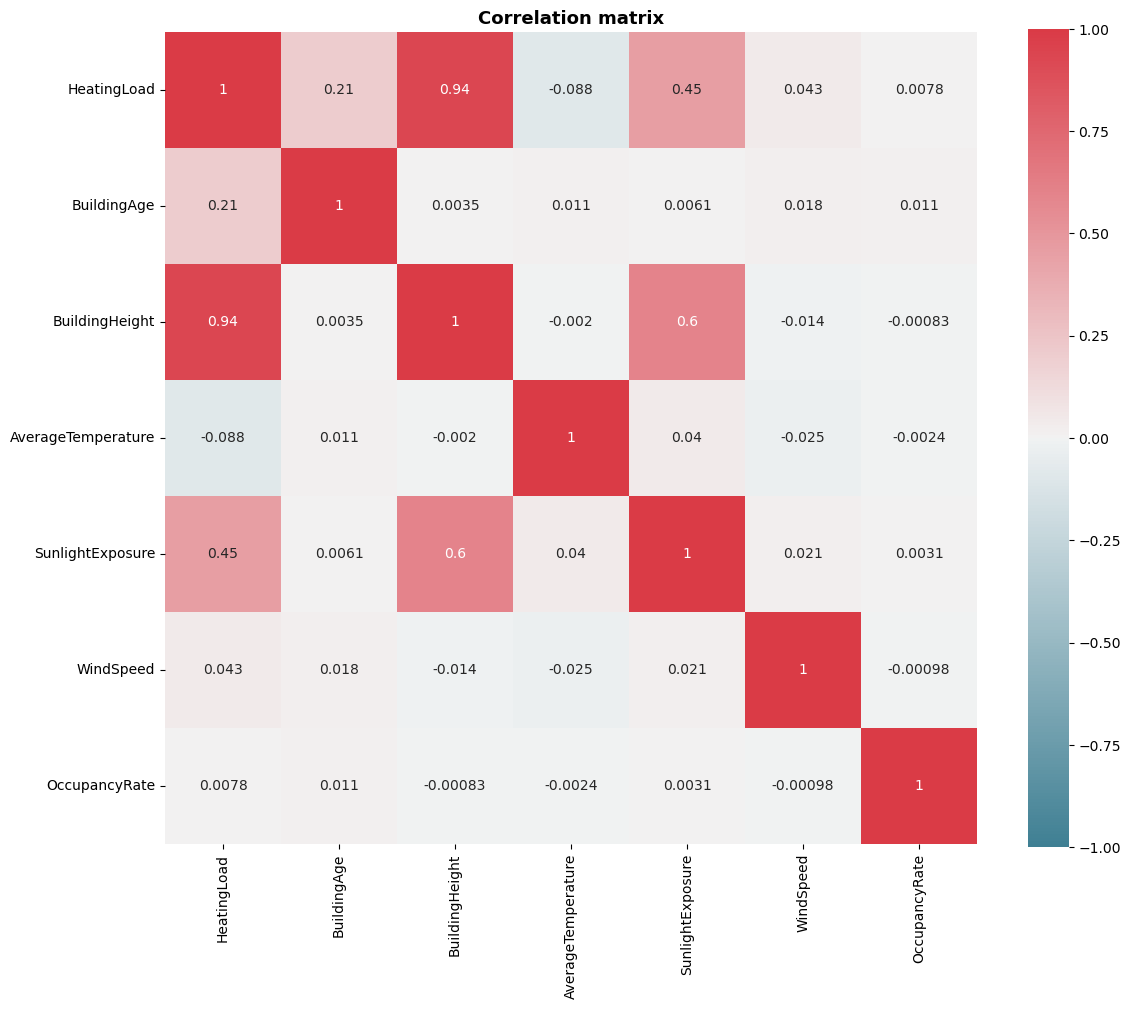

In [9]:
numerical_variables = ['HeatingLoad', 'BuildingAge','BuildingHeight', 'AverageTemperature','SunlightExposure','WindSpeed','OccupancyRate']
fig, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[numerical_variables].corr(), vmax=1, vmin=-1, annot=True, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()

In [10]:
train[numerical_variables].corr().round(4)

,HeatingLoad,BuildingAge,BuildingHeight,AverageTemperature,SunlightExposure,WindSpeed,OccupancyRate
HeatingLoad,1.0000,0.2077,0.9372,-0.0878,0.4544,0.0428,0.0078
BuildingAge,0.2077,1.0000,0.0035,0.0112,0.0061,0.0182,0.0114
BuildingHeight,0.9372,0.0035,1.0000,-0.0020,0.5985,-0.0140,-0.0008
AverageTemperature,-0.0878,0.0112,-0.0020,1.0000,0.0404,-0.0250,-0.0024
SunlightExposure,0.4544,0.0061,0.5985,0.0404,1.0000,0.0210,0.0031
WindSpeed,0.0428,0.0182,-0.0140,-0.0250,0.0210,1.0000,-0.0010
OccupancyRate,0.0078,0.0114,-0.0008,-0.0024,0.0031,-0.0010,1.0000


We can observe that the only significant correlation between the predictors is Sunlight Exposure and Building Height (0.6), suggests that taller buildings receive more sunlight. This is reasonable, as higher buildings have higher floors and fewer obstructions blocking sunlight. Therefore, we should keep this in mind for multicollinearity problem. 

# II. Model Selection

## 1. KNN

We choose KNN as the first method to use in model selection, as it can capture non-linear relationships spotted in EDA. 

### 1.1. KNN Regression

To perform KNN, we split the train data set into training and valiation datasets, with 70% in training and 30% in validation. We fit the two following models based on the exploratory data analysis:

1. Model with only BuildingHeight as the predictor
2. Model with BuildingHeight, SunlightExposure, and Building Age as predictors

We use training data to fit, and validation data's mean square error to measure the performance of the models. We select from K = 1 to 100 to find the best performing number of neighbours. 

In [11]:
training = train.sample(frac=0.7, random_state=1)
validation = train[train.index.isin(training.index)==False]

### Model 1: Only Building Height as the predictor

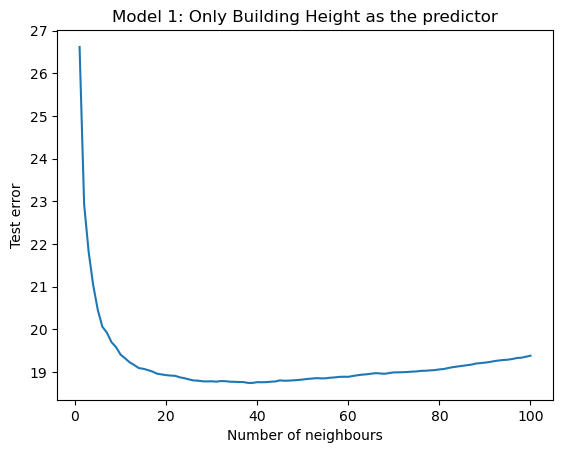

Lowest test error: K = 38


In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

neighbours=np.arange(1, 101)
test_rmse = []
for k in neighbours: 
    knn = KNeighborsRegressor(n_neighbors = k) 
    knn.fit(training[['BuildingHeight']], training['HeatingLoad'])
    predictions1 = knn.predict(validation[['BuildingHeight']])
    rmse = np.sqrt(mean_squared_error(validation['HeatingLoad'], predictions1))
    test_rmse.append(rmse)

fig, ax= plt.subplots()
ax.plot(neighbours, test_rmse, color='#1F77B4')
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Test error')
plt.title('Model 1: Only Building Height as the predictor')
plt.show()

print('Lowest test error: K = {}'.format(1 + np.argmin(test_rmse)))

In [13]:
mse1 = mean_squared_error(validation['HeatingLoad'], predictions1)

mse1

375.7868501466133

### Model 2: Building Height, Sunlight Exposure, and Building Age as predictors

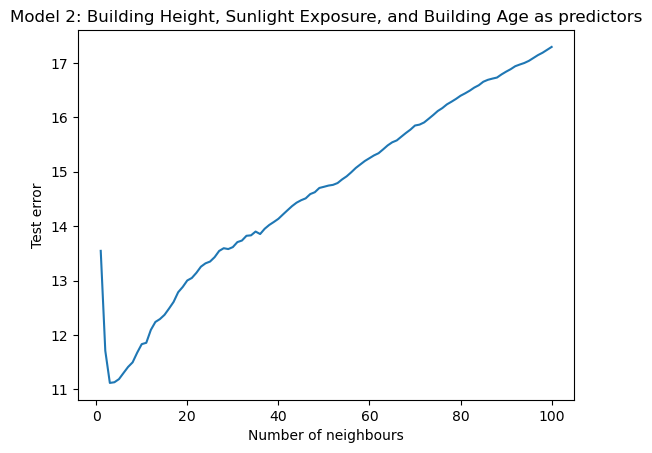

Lowest test error: K = 3


In [14]:
# With more predictors, we use Normalized Distance Metric
predictors=['BuildingHeight', 'SunlightExposure', 'BuildingAge']

neighbours=np.arange(1, 101)
test_rmse = []
for k in neighbours: 
    knn = KNeighborsRegressor(n_neighbors= k,  metric='mahalanobis', metric_params={'V': training[predictors].cov()}) #Use Normalized Distance 
    knn.fit(training[predictors], training['HeatingLoad'])
    predictions2 = knn.predict(validation[predictors])
    rmse = np.sqrt(mean_squared_error(validation['HeatingLoad'], predictions2))
    test_rmse.append(rmse)

fig, ax= plt.subplots()
ax.plot(neighbours, test_rmse, color='#1F77B4')
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Test error')
plt.title('Model 2: Building Height, Sunlight Exposure, and Building Age as predictors')
plt.show()
                                   
print('Lowest test error: K = {}'.format(1 + np.argmin(test_rmse)))

In [15]:
mse2 = mean_squared_error(validation['HeatingLoad'], predictions2)

mse2

299.1375217092733

Therefore, K = 38 neighbours has the best test performance for the model with only BuildingHeight as a predictor, with the mean square error of 375.7869. K = 3 has the best test performance for the model with BuildingHeight, SunlightExposure, and Building Age as predictors, with a lower mean square error of 299.1375.

In the first model, we can notice that the validation performance is approximately the same for K from 20 to 50. However, from K = 50 onwards, the performance start to slightly decrease, creating a smooth u-shape error. In the second model, the validation performance decrease sharply as K increase to be larger than 3, creating a significantly more aggressive u-shape error than the first model. 

However, with this information, we are not sure if K = 38 and K = 3 are the best number of neighbours for the models. Hence, we need to conduct Cross Validation.

### 1.2. KNN Cross Validation

Now, we try to complete model selection with Cross Validation of the two models with the training dataset, as Cross Validation can be use in selecting between models with different number of predictors. We use the 10-fold CV iterator. 

### Model 1: Only Building Height as the predictor

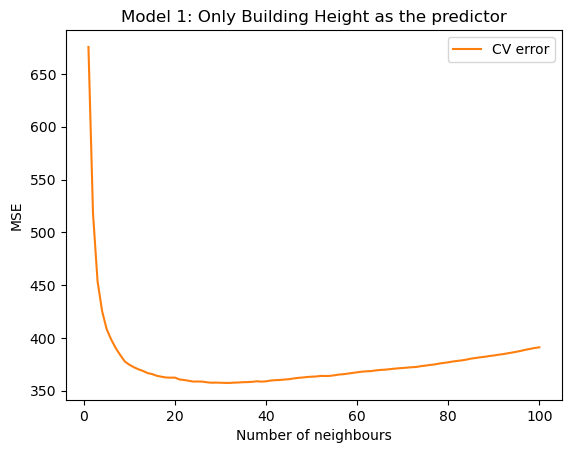

Lowest CV error: K = 32


In [16]:
from sklearn.model_selection import cross_val_score
neighbours=np.arange(1, 101)

cv_mse = []
for k in neighbours: 
    knn = KNeighborsRegressor(n_neighbors= k) 
    scores = cross_val_score(knn, training[['BuildingHeight']], training['HeatingLoad'], cv=10, scoring = 'neg_mean_squared_error')
    # taking the average MSE across folds
    mse = -1*np.mean(scores)
    cv_mse.append(mse)
    knn.fit(training[['BuildingHeight']], training['HeatingLoad'])
    
fig, ax= plt.subplots()
ax.plot(neighbours, cv_mse, color='#FF7F0E', label='CV error')
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('MSE')
plt.title('Model 1: Only Building Height as the predictor')
plt.legend()
plt.show()
  
print('Lowest CV error: K = {}'.format(1 + np.argmin(cv_mse)))   

### Model 2: Building Height, Sunlight Exposure, and Building Age as predictors

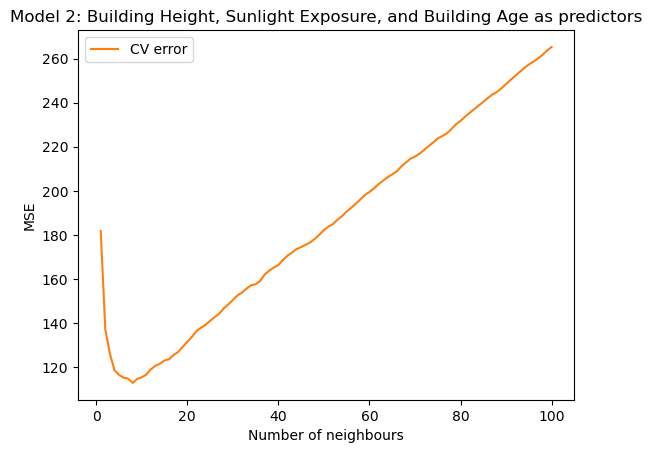

Lowest CV error: K = 8


In [17]:
predictors=['BuildingHeight','BuildingAge', 'SunlightExposure']

neighbours=np.arange(1, 101)
cv_mse = []

for k in neighbours: 
    knn = KNeighborsRegressor(n_neighbors = k, metric='mahalanobis', metric_params={'V': training[predictors].cov()}) 
    scores = cross_val_score(knn, training[predictors], training['HeatingLoad'], cv=10, scoring = 'neg_mean_squared_error')
    mse = -1*np.mean(scores) # taking the average MSE across folds
    cv_mse.append(mse)
    knn.fit(training[predictors], training['HeatingLoad'])

fig, ax= plt.subplots()
ax.plot(neighbours, cv_mse, color='#FF7F0E', label='CV error')
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('MSE')
plt.legend()
plt.title('Model 2: Building Height, Sunlight Exposure, and Building Age as predictors')
plt.show()
  
print('Lowest CV error: K = {}'.format(1 + np.argmin(cv_mse)))   

With KNN Cross Validation, we can obtain K = 32 as the best number of neighbour for Model 1, and K = 8 as the best number of neighbour for Model 2. Hence, we can summarise the best number of neighbours of KNN Regression and KNN Cross Validation with the following table:


|                             | Model 1 | Model 2| 
|-----------------------------|---------|--------|
| KNN Regression best K       | 38      | 3      |
| KNN Cross Validation best K | 32      | 8      |


### 1.3. Adding more predictors

So far, we have been using only the predictors having the highest correlation to HeatingLoad as predictors. We should also consider the other predictors to improve predictions. 

Hence, we can use a function that: 

1. Takes a list of predictors.
2. Selects the optimal number of neighbors via cross-validation.
3. Refits the optimal KNN model on the whole training data set.
3. Evaluates the model on the validation set.

In [18]:
train.corr().round(4)['HeatingLoad']

BuildingAge           0.2077
BuildingHeight        0.9372
Insulation           -0.0202
AverageTemperature   -0.0878
SunlightExposure      0.4544
WindSpeed             0.0428
OccupancyRate         0.0078
HeatingLoad           1.0000
Name: HeatingLoad, dtype: float64

In [19]:
def knn_test(predictors, response):
    
    neighbours=np.arange(1, 51)
    best_score = -np.inf
    
    for k in neighbours: 
        knn = KNeighborsRegressor(n_neighbors = k, metric='mahalanobis', metric_params={'V': training[predictors].cov()}) 
        scores = cross_val_score(knn, training[predictors], training[response], cv=10, scoring = 'neg_mean_squared_error')

        # taking the average of scores across 10 folds
        cv_score = np.mean(scores)
        # use the cv score for model selection
        if cv_score >= best_score:
            best_score = cv_score
            best_knn = knn
    
    knn = best_knn
    # train the selected model with the whole train set
    knn.fit(training[predictors], training[response])
    # Predict the test data with the selected and re-estimated model
    predictions = knn.predict(validation[predictors])
    test_mse = mean_squared_error(validation[response], predictions)
    cv_mse= -best_score
    print('Chosen K: {}'.format(knn.n_neighbors))
    
    return test_mse, cv_mse 

First, we test the two primary models we had so far:

### Model 1: Only Building Height as the predictor

In [20]:
response='HeatingLoad'
predictors=['BuildingHeight']
test_mse, cv_mse  =  knn_test(predictors, response) 
print('Test MSE : {}'.format(test_mse.round(4)))
print('Cross validation MSE : {}'.format(cv_mse.round(4)))

Chosen K: 31
Test MSE : 352.3862
Cross validation MSE : 357.4193


### Model 2: Building Height, Sunlight Exposure, and Building Age as predictors

In [21]:
response='HeatingLoad'
predictors=['BuildingHeight','SunlightExposure','BuildingAge']
test_mse, cv_mse  =  knn_test(predictors, response) 
print('Test MSE : {}'.format(test_mse.round(4)))
print('Cross validation MSE : {}'.format(cv_mse.round(4)))

Chosen K: 8
Test MSE : 132.1778
Cross validation MSE : 112.9008


The fourth predictor with the highest correlation with HeatingLoad is AverageTemperature. Hence, we add in this predictor in Model 3:

### Model 3: Building Height, Sunlight Exposure, Building Age, and Average Temperature

In [22]:
response='HeatingLoad'
predictors=['BuildingHeight','SunlightExposure','BuildingAge','AverageTemperature']
test_mse, cv_mse  =  knn_test(predictors, response) 
print('Test MSE : {}'.format(test_mse.round(4)))
print('Cross validation MSE : {}'.format(cv_mse.round(4)))

Chosen K: 6
Test MSE : 123.082
Cross validation MSE : 110.1865


The result shows a moderate improvement in the model performance, showing that this is the best model so far. 

Next, we continue to add more predictors to the best model.

### Model 4: Building Height, Sunlight Exposure, Building Age, Average Temperature, and WindSpeed

In [23]:
response='HeatingLoad'
predictors=['BuildingHeight','SunlightExposure','BuildingAge','AverageTemperature','WindSpeed']
test_mse, cv_mse  =  knn_test(predictors, response) 
print('Test MSE : {}'.format(test_mse.round(4)))
print('Cross validation MSE : {}'.format(cv_mse.round(4)))

Chosen K: 7
Test MSE : 150.9599
Cross validation MSE : 132.3811


### Model 5: Building Height, Sunlight Exposure, Building Age, Average Temperature, and Insulation

In [24]:
response='HeatingLoad'
predictors=['BuildingHeight','SunlightExposure','BuildingAge','AverageTemperature','Insulation']
test_mse, cv_mse  =  knn_test(predictors, response) 
print('Test MSE : {}'.format(test_mse.round(4)))
print('Cross validation MSE : {}'.format(cv_mse.round(4)))

Chosen K: 5
Test MSE : 155.7287
Cross validation MSE : 129.2614


### Model 6: Building Height, Sunlight Exposure, Building Age, Average Temperature, and OccupancyRate

In [25]:
response='HeatingLoad'
predictors=['BuildingHeight','SunlightExposure','BuildingAge','AverageTemperature','OccupancyRate']
test_mse, cv_mse  =  knn_test(predictors, response) 
print('Test MSE : {}'.format(test_mse.round(4)))
print('Cross validation MSE : {}'.format(cv_mse.round(4)))

Chosen K: 6
Test MSE : 179.0429
Cross validation MSE : 162.6461


Due to overfitting and curse of dimensionality, as we start to try using more predictors, the models starts to overfit, causing significant decreases in performance. Therefore, the Cross-Validation suggests that the best KNN model: Model 3 only use BuildingHeight, SunlightExposure, BuildingAge, and AverageTemperature as predictors, with K = 6 and a Cross Validation MSE of 110.1865.

## 2. Linear Regression

For Linear Regression, we use polynomial transformation models to capture the non-linear relationships showed through the exploratory data analysis. We will use the best set of predictors identified in the KNN section, including Building Height, Building Age, Sunlight Exposure, and Average Temperature for the models. 

### 2.1. CV for Polynomial Linear Regression

We use the the 10-fold CV iterator and the training dataset to choose the model with the lowest Cross Validation MSE among the 10 polynomial models with different number of predictors:

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

predictors=['BuildingAge','BuildingHeight','SunlightExposure', 'AverageTemperature']

max_deg = 11

cv_scores_lr = []

for i in range(1, max_deg):
    
    poly_transformer = PolynomialFeatures(i) 
    poly_x = poly_transformer.fit_transform(training[predictors])
    
    # Create the linear regression object
    lin_reg = LinearRegression()
    
    # use 10-fold cv
    scores_lr = cross_val_score(lin_reg, poly_x, training['HeatingLoad'], cv=10, scoring = 'neg_mean_squared_error')

    # Get the mean of the scores from the 10 folds
    cv_score = -np.mean(scores_lr)
    
    cv_scores_lr.append(cv_score)

In [27]:
cv_scores_lr

[318.8910749388115,
 26.627177143524534,
 26.77276316336825,
 28.303121113791615,
 38.420741110574895,
 132.68298879606922,
 8356.779896345422,
 306437.89046695345,
 2458554.07008959,
 59580582.6262655]

In [28]:
1 + np.argmin(cv_scores_lr)

2

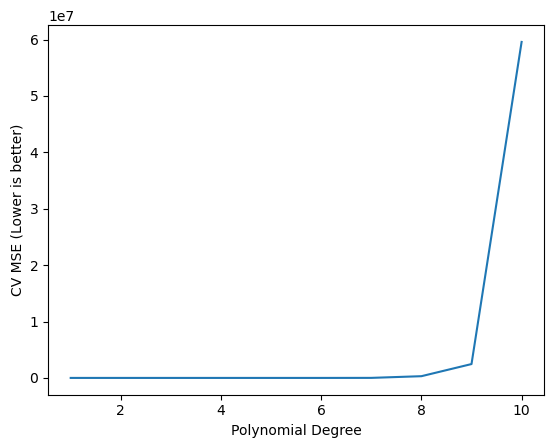

In [29]:
fig = plt.figure()

plt.plot(np.arange(1,max_deg), cv_scores_lr)

plt.xlabel("Polynomial Degree")
plt.ylabel("CV MSE (Lower is better)")
plt.show()

In the above plot the extreme values make the pattern of the plot not clear. We plot CV score versus the first 6 polynomial orders.

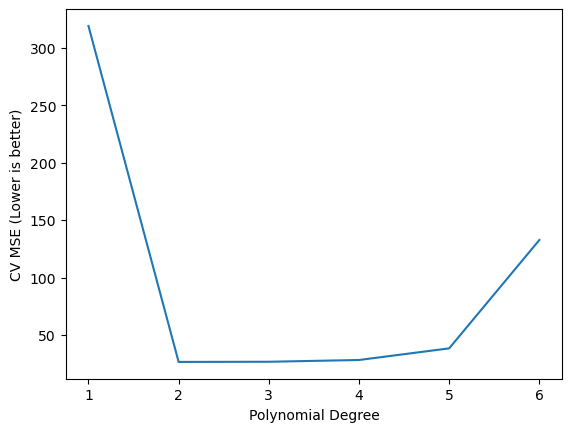

In [30]:
fig = plt.figure()

plt.plot(np.arange(1,7), cv_scores_lr[0:6])

plt.xlabel("Polynomial Degree")
plt.ylabel("CV MSE (Lower is better)")
plt.show()

With Cross Validation, we identified that the Quadratic model is the best performing model among the 10 polynomial models, having the lowest Cross Validation MSE of 26.6272. However, we can see that the Quadratic, Cubic, and Quartic have very similar Cross Validation MSE, and the model start to overfit from the 5th degree. We can further examine this by using AIC and BIC.

### 2.2. Model selection with AIC and BIC in linear regression

With AIC and BIC, we are able to penalize the models with high complexity, preventing overfitting and curse of dimensionality issues. We will use AIC and BIC to select the best model among 10 polynomial models, with different number of degrees and predictors. 

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

max_deg = 10
aic = list()
bic = list()
n = 7000

for k in range(1, max_deg):
    
    poly_transformer = PolynomialFeatures(k) 
    poly_x = poly_transformer.fit_transform(training[predictors])
    y = training['HeatingLoad']
    
    # Create the linear regression object
    lin_reg = LinearRegression()

    # Estimate coefficients
    lin_reg.fit(poly_x, y)
    
    # Calculate predictions
    y_pred = lin_reg.predict(poly_x)
    
    # Calcualte sigma2_hat
    sigma2_hat = mean_squared_error(y, y_pred)
    
    number_of_parameters = k+2
    
    aic_value = n*np.log(sigma2_hat)+2*number_of_parameters
    bic_value = n*np.log(sigma2_hat)+np.log(n)*number_of_parameters
    
    aic.append(aic_value)
    bic.append(bic_value)

In [32]:
aic

[40326.54778253122,
 22955.05606866375,
 22941.11624683542,
 22912.666751774083,
 22893.150183031827,
 22922.728494762294,
 28881.91180786223,
 35439.2871723862,
 37933.4041284553]

In [33]:
bic

[40347.10877881533,
 22982.470730375902,
 22975.384573975607,
 22953.788744342306,
 22941.12584102809,
 22977.557818186593,
 28943.594796714566,
 35507.82382666657,
 38008.79444816372]

**AIC**:
AIC state that the 5th degree is the best model, having an AIC of 22906.8369. After degree 5, the model start to overfit due to high model complexity. 

**BIC**: 
Similarly, BIC state that the 4th degree is the best model having a BIC of 22953.7887 due to the higher penalty on model complexity. The BIC values increase after degree 5, and the increases are stronger than in the AIC results. This reflects BIC’s stronger penalty for additional parameters, especially in larger datasets (in this case, n = 7000 for training data)

However, we can see that the 2nd, 3rd, 4th, and 5th degree models are very similar in AIC and BIC, and the model start to overfit from the 6th degree. Hence, it is reasonable to choose the Quadratic model as the best polynomial model, with AIC of 22955.0561 and BIC of 22982.4707.

Next, we use Cross Validation to evaluate and compare the performance of the best KNN model and the best Polynomial model:

## 3. Evaluate Polynomial and KNN Model Performance

Through KNN and Polynomial Regression model selection, we are able to identify the two best model for each type of regression:

1. KNN model with K = 6
2. 2nd Degree Polynomial model 

Hence, we can select the best model among these two models using MSE as the test error for the validation dataset:

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
predictors=['BuildingAge','BuildingHeight', 'AverageTemperature','SunlightExposure']

# Build poly2 model
poly_transformer = PolynomialFeatures(2) 
poly_x = poly_transformer.fit_transform(training[predictors])
poly_reg = LinearRegression()
poly_reg.fit(poly_x, training['HeatingLoad'])
    
# Build knn model
knn = KNeighborsRegressor(n_neighbors = 6, metric='mahalanobis', metric_params={'V': training[predictors].cov()})
knn.fit(training[predictors], training['HeatingLoad'])

KNeighborsRegressor(metric='mahalanobis',
                    metric_params={'V':                     BuildingAge  BuildingHeight  AverageTemperature  \
BuildingAge          154.170094       -2.229990            0.142397   
BuildingHeight        -2.229990      285.187318            0.149016   
AverageTemperature     0.142397        0.149016           16.688774   
SunlightExposure       3.316658     2304.986186           45.919691   

                    SunlightExposure  
BuildingAge                 3.316658  
BuildingHeight           2304.986186  
AverageTemperature         45.919691  
SunlightExposure        52081.884167  },
                    n_neighbors=6)

In [35]:
poly_x_validation = poly_transformer.fit_transform(validation[predictors])
validationpoly = poly_reg.predict(poly_x_validation)
msepoly = mean_squared_error(validation[response], validationpoly)
msepoly.round(4)

26.8792

In [36]:
validationknn = knn.predict(validation[predictors])
mseknn = mean_squared_error(validation['HeatingLoad'], validationknn)
mseknn.round(4)

123.082

In [37]:
# Make the results pretty

data = [
    {"Model": "Polynomial Regression", "MSE": msepoly.round(4)},
    {"Model": "KNN Regressor", "MSE": mseknn.round(4)}
]

results = pd.DataFrame(data)
results = results.set_index("Model")
results

,MSE
Model,
Polynomial Regression,26.8792
KNN Regressor,123.0820


As we can see, the 2nd Degree Polynomial model have significant better performance, with a MSE of 26.8792 comparing to a MSE of 123.0820 for the KNN Regression model. Hence, the best model selected so far is the 2nd Degree Polynomial model. 

## 4. Lasso Regularization

Next, I implemented Lasso regression to perform variable selection and choose a sparse model containing a subset of predictors. Lasso regression can be useful in preventing overfitting issues comparing to linear regression and OLS models. 

### Standardization

As Lasso regularization require standardizing the predictors by subtracting the mean (centering to 0 mean) and dividing by the standard deviation (scaling to unit variance), I standardize the all predictors in the training dataset. Hence, all means are close to 0, while standard deviations are close to 1. 

In [38]:
predictors = ['BuildingAge','BuildingHeight', 'AverageTemperature','SunlightExposure','WindSpeed','OccupancyRate','Insulation']

In [39]:
response = ['HeatingLoad']

In [40]:
mu=training[predictors].mean() # mean for each feature
sigma=training[predictors].std() # std for each feature

In [41]:
# Standardize validation and training predictors
training[predictors]=(training[predictors]-mu)/sigma
validation[predictors]=(validation[predictors]-mu)/sigma

/var/folders/3r/42snhvt577z7kf7v8djnkct00000gn/T/ipykernel_37527/556258152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation[predictors]=(validation[predictors]-mu)/sigma


In [42]:
training[predictors].mean().head() # Close to 0

BuildingAge           0.000000e+00
BuildingHeight       -4.669281e-17
AverageTemperature    9.490821e-17
SunlightExposure     -4.060244e-17
WindSpeed             1.258676e-16
dtype: float64

In [43]:
training[predictors].std().head() # Close to 1

BuildingAge           1.0
BuildingHeight        1.0
AverageTemperature    1.0
SunlightExposure      1.0
WindSpeed             1.0
dtype: float64

### 4.1. Lasso Cross Validation

Next, I implemented cross validation to select the best parameter Lambda for the Lasso model.

In [44]:
# Default LassoCV error is 
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=10)
lasso.fit(training[predictors], np.ravel(training[response])) # the np.ravel is a necessary detail for compatibility

LassoCV(cv=10)

In [45]:
print("LASSO Lambda: {0}".format(lasso.alpha_.round(4)))

LASSO Lambda: 0.0699


### Refit Lasso

As we are able to find a Lambda of 0.0699 through Cross Validation, we refit a Lasso regularization model using this Lambda, and calculate the mean square error of this model:

In [46]:
from sklearn import linear_model
Lasso_reg = linear_model.Lasso(alpha=0.0699)
Lasso_reg.fit(training[predictors], np.ravel(training[response]))
pd.DataFrame(Lasso_reg.coef_.round(3), index = predictors).T

,BuildingAge,BuildingHeight,AverageTemperature,SunlightExposure,WindSpeed,OccupancyRate,Insulation
0,15.271,77.256,-6.064,-11.883,4.232,0.645,-1.781


In [47]:
# Calculate MSE for Lasso Model: 
predictionslasso = Lasso_reg.predict(validation[predictors])
mselasso = mean_squared_error(validation[response], predictionslasso)
mselasso.round(4)

267.2268

### 4.2. Model selection with BIC for Lasso

We are able to obtain a MSE of 267.2268 for the Lasso model with a lambda of 0.0699. We can further examine this by using AIC and BIC.

In [48]:
from sklearn.metrics import mean_squared_error

aic = list()
bic = list()
n = 7000

for a in np.arange(0, 1.05, 0.05):
    
    Lasso_reg = linear_model.Lasso(alpha=a)
    Lasso_reg.fit(training[predictors], np.ravel(training[response]))
    pd.DataFrame(Lasso_reg.coef_.round(4), index = predictors).T

    y = training[response]
    
    # Calculate predictions
    y_pred = Lasso_reg.predict(training[predictors])

    # Calcualte sigma2_hat
    sigma2_hat = mean_squared_error(y, y_pred)
    
    aic_value = n*np.log(sigma2_hat)+2*7
    bic_value = n*np.log(sigma2_hat)+np.log(n)*7
    
    aic.append(aic_value)
    bic.append(bic_value)

/Users/bihugo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/bihugo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/bihugo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+06, tolerance: 3.903e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

In [49]:
bic

[39868.90477481303,
 39869.51215059644,
 39871.31679478193,
 39874.31785767665,
 39878.51380105221,
 39883.9024768088,
 39890.48113063447,
 39898.246406685445,
 39907.19435327052,
 39917.32042951975,
 39928.61951301363,
 39941.08590834626,
 39954.713356592474,
 39969.49504564651,
 39985.42362057207,
 40001.38203396007,
 40017.79466543262,
 40035.2234614889,
 40053.66075309846,
 40073.09847601888,
 40093.52818217483]

In [50]:
np.argmin(bic)

0

In [51]:
# Make the results pretty

data = [
    {"Model": "Polynomial Regression", "MSE": msepoly.round(4)},
    {"Model": "KNN Regressor", "MSE": mseknn.round(4)},
    {"Model": "Lasso Regularisation", "MSE": mselasso.round(4)}
]

results = pd.DataFrame(data)
results = results.set_index("Model")
results

,MSE
Model,
Polynomial Regression,26.8792
KNN Regressor,123.0820
Lasso Regularisation,267.2268


I used BIC to select the best models, with lambda ranging from 0 to 1 and a step of 0.05. BIC indicates that the best Lasso model has a lambda of 0 (Appendix M). As lambda rises, BIC slightly increases, showing minimal changes across all lambda values. Hence, choosing the best Lasso model with a lambda of 0.0699 from Cross Validation is recommended. 

Comparing to the best polynomial and KNN models, the best Lasso regularisation has a significantly higher MSE. This is reasonable as Lasso models give sparse solution and better interpretability particularly for when p >> n. However, in both training and validation dataset, the number of observations are significantly higher than the predictors, limiting this advantage of the Lasso regularization models. Hence, we can use another type of regularisation model that fixes this problem, which is Ridge regularisation:

## 5. Ridge Regularization

Next, I implemented Ridge regression to perform variable selection. This type of model can handle multicollinearity, which is suitable for the high correlation between Sunlight Exposure and Building Height identified in the EDA. 

I used the same method of CV and BIC used in Lasso for Ridge regularisation:

### 5.1. Ridge CV and BIC

**BIC**

In [52]:
from sklearn.linear_model import Ridge
from numpy import linalg as LA

lambdas = np.arange(0.01,40,.01)
def calc_aic_bic(lamb):    
    ridge = Ridge(alpha=lamb, fit_intercept=False)
    ridge.fit(training[predictors], training[response])
    coef = ridge.coef_
    ridge_hat = ridge.predict(training[predictors])
    w, v = LA.eig(np.dot(training[predictors].transpose(),training[predictors]))
    df = sum(w/(w+lamb))
    aic = n*np.log(mean_squared_error(np.ravel(training[response]), ridge_hat))+2*df
    bic = n*np.log(mean_squared_error(np.ravel(training[response]), ridge_hat))+np.log(n)*df

    return aic,bic  
    
aic, bic = [], []
for lamb in lambdas:
    aic.append(calc_aic_bic(lamb)[0])
    bic.append(calc_aic_bic(lamb)[1])

In [53]:
index = np.argmin(bic)
lambda_BIC = lambdas[index]
[lambda_BIC]

[39.99]

**CV**

In [54]:
from sklearn.linear_model import RidgeCV
alphas = 10**np.linspace(10,-2,100)*0.5

ridgecv = RidgeCV(alphas = alphas, cv = 10, scoring = 'neg_mean_squared_error')
ridgecv.fit(training[predictors], np.ravel(training[response]))

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [55]:
print("Ridge Lambda: {0}".format(ridgecv.alpha_.round(4)))

Ridge Lambda: 0.005


As we can see, Cross validation return a lambda of 0.005. BIC returns the same lambda of 39.99, a significantly high amount for the parameter. Hence, to prevent overfitting, the lamdba from CV of 0.005 should be chosen for the best Ridge model. 

### Refit Ridge

In [56]:
Ridge_reg = linear_model.Ridge(alpha=0.005)
Ridge_reg.fit(training[predictors], np.ravel(training[response]))
pd.DataFrame(Ridge_reg.coef_.round(3), index = predictors).T

,BuildingAge,BuildingHeight,AverageTemperature,SunlightExposure,WindSpeed,OccupancyRate,Insulation
0,15.342,77.436,-6.125,-12.06,4.307,0.715,-1.855


In [57]:
# Calculate MSE for Ridge Model: 
predictionsridge = Ridge_reg.predict(validation[predictors])
mseridge = mean_squared_error(validation[response], predictionsridge)
mseridge.round(4)

267.4273

In [58]:
data = [
    {"Model": "Polynomial Regression", "MSE": msepoly.round(4)},
    {"Model": "KNN Regressor", "MSE": mseknn.round(4)},
    {"Model": "Lasso Regularisation", "MSE": mselasso.round(4)},
    {"Model": "Ridge Regularisation", "MSE": mseridge.round(4)}
]

results = pd.DataFrame(data)
results = results.set_index("Model")
results

,MSE
Model,
Polynomial Regression,26.8792
KNN Regressor,123.0820
Lasso Regularisation,267.2268
Ridge Regularisation,267.4273


Among the four models, the best Ridge regularisation model have the worst ability to predict the HeatingLoad on the validation dataset, with an MSE of 267.4273. This is because there are no significant multicollinearity issues in the dataset, with a correlation close to 0 for almost all of the predictors, expect a correlation of 0.6 for Sunlight Exposure and Building Height, which is not enough to be a multicolinearity issue. Hence, Ridge is not a suitable method for this dataset. 

In conclusion, the 2nd-degree polynomial regression model can best predict this dataset, with an MSE of 26.8792.

# III. Final Model Predictions

In [59]:
# Refit Final Model: 2nd-Degree Polynomial Regression Model
poly_transformer = PolynomialFeatures(2) 
poly_x = poly_transformer.fit_transform(train[predictors])
poly_x_test = poly_transformer.fit_transform(test[predictors])
poly_reg = LinearRegression()
poly_reg.fit(poly_x, train['HeatingLoad'])

# Transform test predictors
poly_x_test = poly_transformer.fit_transform(test[predictors])

In [60]:
predictionspoly = poly_reg.predict(poly_x_test)
predictionspoly

array([230.04975301, 205.7116068 , 323.40376389, ..., 279.0001504 ,
       259.11248703, 298.21466048])

In [63]:
type(predictionspoly)

numpy.ndarray

In [61]:
# save array into csv file 
np.savetxt("530533548_Assignment1_HL_prediction.csv", predictionspoly, delimiter=',', header='HeatingLoad')

In [66]:
predictionspoly = pd.read_csv('530533548_Assignment1_HL_prediction.csv')
predictionspoly.head()

,# HeatingLoad
0,230.049753
1,205.711607
2,323.403764
3,240.298164
4,195.487426


In [69]:
type(predictionspoly['# HeatingLoad'])

pandas.core.series.Series

In [62]:
# Final Code to generate test error:
import pandas as pd

HeatingLoad_test = pd.read_csv("HeatingLoad_test.csv")

test_error = mean_squared_error(HeatingLoad_test['HeatingLoad'], predictionspoly)

print(test_error)

FileNotFoundError: [Errno 2] No such file or directory: 'HeatingLoad_test.csv'